# Cursory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## df1: Fake News Data Set

### Loading Data

In [ ]:
df1 = pd.read_csv('./data/fake_news_data_set.csv')
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Author                   2119 non-null   object 
 1   Published                2120 non-null   object 
 2   Title                    2120 non-null   object 
 3   Text                     2075 non-null   object 
 4   Language                 2119 non-null   object 
 5   Site_url                 2119 non-null   object 
 6   Main_img_url             2119 non-null   object 
 7   Type                     2119 non-null   object 
 8   Label                    2119 non-null   object 
 9   Title_without_stopwords  2117 non-null   object 
 10  Text_without_stopwords   2069 non-null   object 
 11  HasImage                 2118 non-null   float64
dtypes: float64(1), object(11)
memory usage: 198.9+ KB
None


,Author,Published,Title,Text,Language,Site_url,Main_img_url,Type,Label,Title_without_stopwords,Text_without_stopwords,HasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


### Examination

In [ ]:
print(df1['Site_url'].value_counts())
df1['Site_url'].value_counts().describe()

wnd.com                  100
clickhole.com            100
westernjournalism.com    100
returnofkings.com        100
prisonplanet.com         100
                        ... 
redstatewatcher.com        1
proudemocrat.com           1
projectveritas.com         1
globalresearch.ca          1
thepeoplescube.com         1
Name: Site_url, Length: 69, dtype: int64


count     69.000000
mean      30.710145
std       37.430760
min        1.000000
25%        2.000000
50%        9.000000
75%       55.000000
max      100.000000
Name: Site_url, dtype: float64

<Axes: >

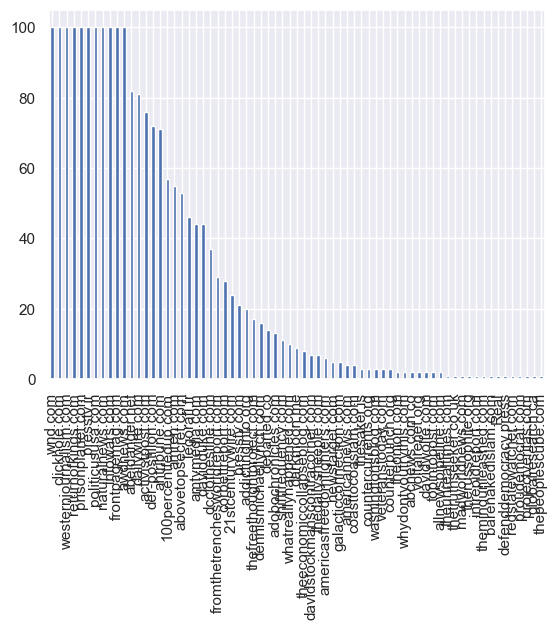

In [ ]:
df1['Site_url'].value_counts().plot(kind='bar')

In [ ]:
df1.groupby('Site_url')['Label'].value_counts()

Site_url                Label
100percentfedup.com     Real     57
21stcenturywire.com     Fake     24
Real                    1         1
abcnews.com.co          Fake      2
abeldanger.net          Fake     82
                                 ..
westernjournalism.com   Fake      2
whatreallyhappened.com  Fake     10
whydontyoutrythis.com   Real      2
wnd.com                 Real     98
                        Fake      2
Name: Label, Length: 79, dtype: int64

#### Inspecting for Nulls and Duplicates

In [2]:
# Not sure why I get the following results
def inspect(df):
    print('Number of Nulls per column:')
    print(df.isnull().sum())
    print(f'\nNumber of duplicates: {df.duplicated().sum()}')
    print(f"\nshape: {df.shape}")

In [ ]:
inspect(df1)

### Observations

1. Not sure what criteria are being used to assign `Fake` or `Real`
   - There are some questionable sources here where the articles are labled `Real`, but their type is `bias`; theoretically, the content is true but heavily exaggerated.
2. Source distribution is weird; maybe not important if all we're dealing with is text
3. Weird results obtained when inspecting database for nulls and duplicates

## df2: Sarcasm Headlines

### Loading Data

In [ ]:
df2 = pd.read_json('./data/sarcasm_headlines_dataset_v2.json', lines=True)
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
None


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


### Examination

In [ ]:
df2['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

### Inspecting for Nulls and Duplicates

In [ ]:
inspect(df2)

Number of Nulls per column:
is_sarcastic    28619
headline        28619
article_link    28619
dtype: int64

Number of duplicates: 28619

shape: (28619, 3)


### Observations

1. Source diversity isn't strong; may lead to some overfitting problems
2. Approximately equal number of fake and news headlines

## df3: WELFake Dataset

### Loading Data

In [ ]:
# Note: Real = 0, Fake = 1
df3 = pd.read_csv('./data/WELFake_Dataset.csv')
print(df3.info())
df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


### Examination

In [ ]:
df3['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

### Inspecting for Nulls and Duplicates

In [40]:
inspect(df3)

Number of Nulls per column:
Unnamed: 0    72134
title         72134
text          72134
label         72134
dtype: int64

Number of duplicates: 72134

shape: (72134, 4)


### Observations

1. Diverse set of sources. Published in IEEE; therefore, likely high rigor in fact-checking

## df4: Getting Real About Fake News Data Set

### Loading Data

In [3]:
df4 = pd.read_csv('./data/getting_real_dataset.csv')
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


### Examination

In [5]:
df4['type'].value_counts()

type
bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: count, dtype: int64

In [4]:
df4['language'].value_counts()

language
english       12403
russian         203
spanish         172
german          111
french           38
arabic           22
portuguese       11
turkish          10
italian           9
ignore            7
greek             4
dutch             3
norwegian         3
finnish           1
chinese           1
polish            1
Name: count, dtype: int64

### Inspecting for Nulls and Duplicates

In [6]:
inspect(df4)

Number of Nulls per column:
uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

Number of duplicates: 0

shape: (12999, 20)


### Observations

- No label for fake or real news; I'm confident we can assume all of these articles are fake
- Adding this data set may cause an imbalance in ratio of fake to real articles; we'll most likely need to stratify our training and testing samples